In [1]:
import os 
import pandas as pd
import polars as pl

## WB data

### 3. Task
#### a) The head

In [9]:
wb = pd.read_csv(rf"{path}\WB_pop_clean.csv")
wb.head()

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,19688632,21000256,22645130,29249157,30466479,31541209,40099462,41128771,42239854
1,"Population, total",SP.POP.TOTL,Albania,ALB,3060173,3051010,3039616,2905195,2900401,2895092,2811666,2777689,2745972
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31200985,31624696,32055883,36543541,37260563,38000626,44177969,44903225,45606480
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,58324,58177,57941,54310,53691,52995,45035,44273,43914
4,"Population, total",SP.POP.TOTL,Andorra,AND,67820,70849,73907,70567,71013,71367,79034,79824,80088


##### b) Country codes

In [15]:
wb["Country Code"].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA',
       'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT',
       'MUS', 'MEX',

#### c) NAs

In [20]:
# Missing values
wb[wb.isna().any(axis=1)]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023


In [75]:
wb.describe()

,2001,2002,2003,2011,2012,2013,2021,2022,2023
count,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02,2.180000e+02
mean,5.702126e+07,5.777115e+07,5.851666e+07,6.460916e+07,6.541101e+07,6.621822e+07,7.226807e+07,7.284406e+07,7.351661e+07
std,4.357249e+08,4.413970e+08,4.470272e+08,4.927859e+08,4.988148e+08,5.048778e+08,5.500182e+08,5.542406e+08,5.591759e+08
min,9.621000e+03,9.609000e+03,9.668000e+03,1.028300e+04,1.044400e+04,1.069400e+04,1.120400e+04,1.131200e+04,1.139600e+04
25%,6.252495e+05,6.425825e+05,6.631015e+05,7.210558e+05,7.268502e+05,7.335218e+05,8.088315e+05,8.157380e+05,8.233942e+05
50%,5.175659e+06,5.267269e+06,5.352080e+06,5.893246e+06,5.896596e+06,5.995436e+06,6.719538e+06,6.564773e+06,6.567063e+06
75%,1.716950e+07,1.764196e+07,1.812237e+07,2.214575e+07,2.245686e+07,2.226016e+07,2.590028e+07,2.617334e+07,2.706177e+07
max,6.226487e+09,6.308285e+09,6.389593e+09,7.053989e+09,7.141431e+09,7.229458e+09,7.888964e+09,7.951595e+09,8.024997e+09


### 5. Min and axes

In [47]:
wb_wo_wld = wb[wb["Country Code"] != "WLD"]

In [40]:
# Min / Max overall
wb_stack = wb.melt(id_vars=wb.columns[:4].to_list(), value_vars=wb.columns[4:].to_list())
print(wb_stack.head())
# Min / Max overall
print("Min overall: ", min(wb_stack["value"]))
print("Max overall: ", max(wb_stack["value"]))

         Series Name  Series Code    Country Name Country Code variable  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG     2001   
1  Population, total  SP.POP.TOTL         Albania          ALB     2001   
2  Population, total  SP.POP.TOTL         Algeria          DZA     2001   
3  Population, total  SP.POP.TOTL  American Samoa          ASM     2001   
4  Population, total  SP.POP.TOTL         Andorra          AND     2001   

      value  
0  19688632  
1   3060173  
2  31200985  
3     58324  
4     67820  
Min overall:  9609
Max overall:  8024997028


In [49]:
print("Min/Max without total world")
# Min / Max overall
wb_wo_wld_stack = wb_wo_wld.melt(id_vars=wb_wo_wld.columns[:4].to_list(), value_vars=wb_wo_wld.columns[4:].to_list())
print(wb_wo_wld_stack.head())
# Min / Max overall
print("Min overall: ", min(wb_wo_wld_stack["value"])) # min(wb.describe().loc["min"])
print("Max overall: ", max(wb_wo_wld_stack["value"]))

Min/Max without total world
         Series Name  Series Code    Country Name Country Code variable  \
0  Population, total  SP.POP.TOTL     Afghanistan          AFG     2001   
1  Population, total  SP.POP.TOTL         Albania          ALB     2001   
2  Population, total  SP.POP.TOTL         Algeria          DZA     2001   
3  Population, total  SP.POP.TOTL  American Samoa          ASM     2001   
4  Population, total  SP.POP.TOTL         Andorra          AND     2001   

      value  
0  19688632  
1   3060173  
2  31200985  
3     58324  
4     67820  
Min overall:  9609
Max overall:  1428627663


In [22]:
# Min / Max 2023
print("Min 2023: ", min(wb["2023"]))
print("Max 2023: ", max(wb["2023"]))

Min 2023:  11396
Max 2023:  8024997028


In [50]:
print("Min/max 2023 without total world")
# Min / Max 2023
print("Min 2023: ", min(wb_wo_wld["2023"]))
print("Max 2023: ", max(wb_wo_wld["2023"]))

Min/max 2023 without total world
Min 2023:  11396
Max 2023:  1428627663


In [54]:
print("Country with the lowest population in 2023: ", wb_wo_wld.iloc[wb_wo_wld["2023"].idxmin(), 2])
print("Country with the highest population in 2023: ", wb_wo_wld.iloc[wb_wo_wld["2023"].idxmax(), 2])

Country with the lowest population in 2023:  Tuvalu
Country with the highest population in 2023:  India


### 6. Spain and homecountry

In [27]:
# Spain:
wb[wb["Country Name"] == "Spain"]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
179,"Population, total",SP.POP.TOTL,Spain,ESP,40850412,41431558,42187645,46742697,46773055,46620045,47415794,47778340,48373336


In [28]:
# Home country:
wb[wb["Country Name"] == "Germany"]

,Series Name,Series Code,Country Name,Country Code,2001,2002,2003,2011,2012,2013,2021,2022,2023
73,"Population, total",SP.POP.TOTL,Germany,DEU,82349925,82488495,82534176,80274983,80425823,80645605,83196078,83797985,84482267


#### Row/Column with difference over time

In [68]:
wb_stack["Diffs"] = wb_stack.groupby(["Country Code"])["value"].diff()
wb_stack.head(-5)

,Series Name,Series Code,Country Name,Country Code,variable,value,Diffs
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,2001,19688632,NaN
1,"Population, total",SP.POP.TOTL,Albania,ALB,2001,3060173,NaN
2,"Population, total",SP.POP.TOTL,Algeria,DZA,2001,31200985,NaN
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,2001,58324,NaN
4,"Population, total",SP.POP.TOTL,Andorra,AND,2001,67820,NaN
...,...,...,...,...,...,...,...
1952,"Population, total",SP.POP.TOTL,Uzbekistan,UZB,2023,36412350,764250.0
1953,"Population, total",SP.POP.TOTL,Vanuatu,VUT,2023,334506,7766.0
1954,"Population, total",SP.POP.TOTL,"Venezuela, RB",VEN,2023,28838499,536803.0
1955,"Population, total",SP.POP.TOTL,Viet Nam,VNM,2023,98858950,672094.0


### 7. Other and plotting

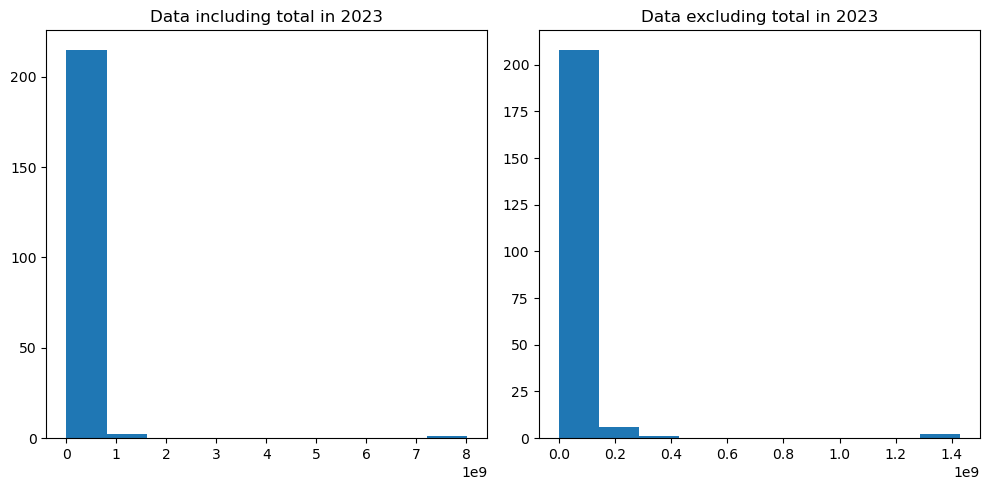

In [86]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(wb["2023"])
axes[0].title.set_text("Data including total in 2023")
axes[1].hist(wb_wo_wld["2023"])
axes[1].title.set_text("Data excluding total in 2023")
fig.tight_layout()


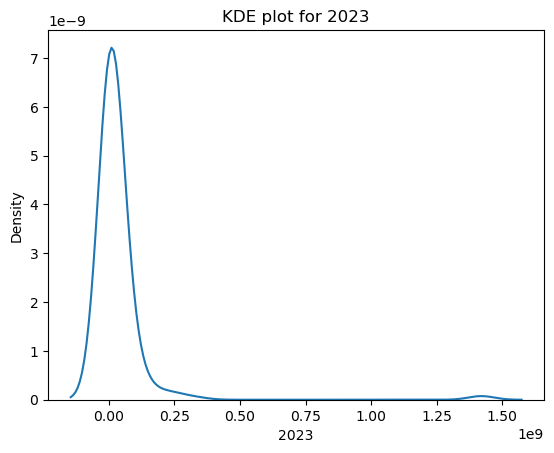

In [88]:
import seaborn as sns

fig_sns = sns.kdeplot(wb_wo_wld["2023"])
fig_sns.title.set_text("KDE plot for 2023")

In [89]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   218 non-null    object
 1   Series Code   218 non-null    object
 2   Country Name  218 non-null    object
 3   Country Code  218 non-null    object
 4   2001          218 non-null    int64 
 5   2002          218 non-null    int64 
 6   2003          218 non-null    int64 
 7   2011          218 non-null    int64 
 8   2012          218 non-null    int64 
 9   2013          218 non-null    int64 
 10  2021          218 non-null    int64 
 11  2022          218 non-null    int64 
 12  2023          218 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 22.3+ KB


In [98]:
wb.iloc[1:5, [wb.columns.get_loc("Country Code")]]

,Country Code
1,ALB
2,DZA
3,ASM
4,AND


## Text data

In [84]:
path = os.getcwd() + r"\data"
txt = pd.read_csv(rf"{path}\text_data.csv")
txt.head()

,country,title,event_type
0,KHM,President Expands Control: Courts Declare Oppo...,judiciary_weakened
1,TUR,Emergency Powers Extended: Constitutional Cour...,judiciary_weakened
2,PHL,Supreme Court Backs Martial Law Extension: Cri...,judiciary_weakened
3,ZWE,High Court Deemed 'Enemy of the State': Contro...,judiciary_weakened
4,VEN,Court Overhaul Clears Path for Sweeping Econom...,judiciary_weakened
